## User Engagement Analysis - Task 2

In [1]:
# Import packages
import os,sys

# Add the path to the directory
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)
    
from scripts.utils import *
from db_connection.postgresql_connection import *

In [2]:
# Load dataset from postgres
telecom_df = fetch_data_from_postgres()


In [3]:
# Dataframe head
telecom_df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
# Drop null value and handle missing value
drop_nan(telecom_df)
fill_missing_values(telecom_df)

sessions frequency

In [5]:
# Group users
users_data = telecom_df.groupby('MSISDN/Number')

# Get sessions frequency (count the number of sessions)
users_sessions= users_data['Bearer Id'].count()
users_sessions.head(10)

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
3.360101e+10    2
3.360101e+10    2
3.360101e+10    1
3.360101e+10    2
3.360102e+10    1
Name: Bearer Id, dtype: int64

the duration of the session

In [6]:
# How long each session was
users_sessions= users_data['Dur. (ms)'].sum()
users_sessions

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106471, dtype: float64

In [7]:
# Aggregation of Total values
calculate_total_data(telecom_df)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total UL (Bytes),Total DL (Bytes),Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total_UL_and_DL
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,36749741.0,308879636.0,18355943.0,2905912.0,3701304.0,1570185.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,39359124.0,4414096.0,937385.0,1933278.0,35565545.0,609920783.0,541959383.0,707185356.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,34425237.0,10229119.0,3363124.0,1726277.0,23751202.0,229980251.0,414908351.0,307690973.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,36534765.0,11811761.0,2070983.0,657493.0,15092588.0,810387875.0,761837216.0,889352748.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,34222253.0,7748843.0,2110349.0,912788.0,17539799.0,531237049.0,564619822.0,607681403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,...,53745392.0,819016468.0,24553645.0,1265634.0,4280107.0,993175.0,29618711.0,797160102.0,336273648.0,872761860.0
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,57628851.0,574175259.0,27955095.0,12784914.0,690876.0,3517065.0,37561864.0,535806880.0,16751926.0,631804110.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,39135081.0,666648844.0,22165518.0,4415361.0,2121718.0,2352181.0,40643294.0,631628095.0,714638145.0,705783925.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,34912224.0,592786405.0,24516413.0,6585469.0,2058277.0,1260239.0,15029702.0,566933800.0,132415585.0,627698629.0


the sessions total traffic (download and upload (bytes))

In [8]:
# total traffic download and upload
users = telecom_df[['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'Total_UL_and_DL']].copy().rename(columns={'Dur. (ms)': 'time_duration'})
users

,MSISDN/Number,Bearer Id,time_duration,Total_UL_and_DL
0,3.366496e+10,1.311448e+19,1823652.0,345629377.0
1,3.368185e+10,1.311448e+19,1365104.0,707185356.0
2,3.376063e+10,1.311448e+19,1361762.0,307690973.0
3,3.375034e+10,1.311448e+19,1321509.0,889352748.0
4,3.369980e+10,1.311448e+19,1089009.0,607681403.0
...,...,...,...,...
149995,3.366865e+10,1.304243e+19,59587.0,872761860.0
149996,3.365069e+10,7.277826e+18,81230.0,631804110.0
149997,3.366345e+10,7.349883e+18,97970.0,705783925.0
149998,3.362189e+10,1.311448e+19,98249.0,627698629.0


In [9]:
users = users.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'time_duration': 'sum', 'Total_UL_and_DL': 'sum'})
users = users.rename(columns={'Bearer Id': 'sessions'})
users.head(10)

,sessions,time_duration,Total_UL_and_DL
MSISDN/Number,,,
3.360100e+10,1,116720.0,8.786906e+08
3.360100e+10,1,181230.0,1.568596e+08
3.360100e+10,1,134969.0,5.959665e+08
3.360101e+10,1,49878.0,4.223207e+08
3.360101e+10,2,37104.0,1.457411e+09
3.360101e+10,2,253983.0,6.152172e+08
3.360101e+10,2,128360.0,6.547231e+08
3.360101e+10,1,86399.0,3.326604e+08
3.360101e+10,2,495702.0,9.901322e+08


Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

Top 10 user Engagements to time

In [10]:
# Top 10 user enagement 
users.nlargest(10, 'time_duration')

,sessions,time_duration,Total_UL_and_DL
MSISDN/Number,,,
3.362578e+10,17,18553754.0,8.499621e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.376054e+10,15,9279434.0,8.514774e+09
3.362632e+10,18,8791927.0,7.971167e+09
3.366716e+10,13,8744914.0,5.618394e+09
3.366284e+10,9,6614270.0,4.000098e+09
3.366469e+10,9,6288730.0,5.682007e+09
3.360313e+10,12,6287761.0,4.976195e+09
3.366746e+10,6,5649882.0,2.600522e+09


Top 10 user Engagements to time

In [11]:
users.nlargest(10, 'time_duration')

,sessions,time_duration,Total_UL_and_DL
MSISDN/Number,,,
3.362578e+10,17,18553754.0,8.499621e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.376054e+10,15,9279434.0,8.514774e+09
3.362632e+10,18,8791927.0,7.971167e+09
3.366716e+10,13,8744914.0,5.618394e+09
3.366284e+10,9,6614270.0,4.000098e+09
3.366469e+10,9,6288730.0,5.682007e+09
3.360313e+10,12,6287761.0,4.976195e+09
3.366746e+10,6,5649882.0,2.600522e+09


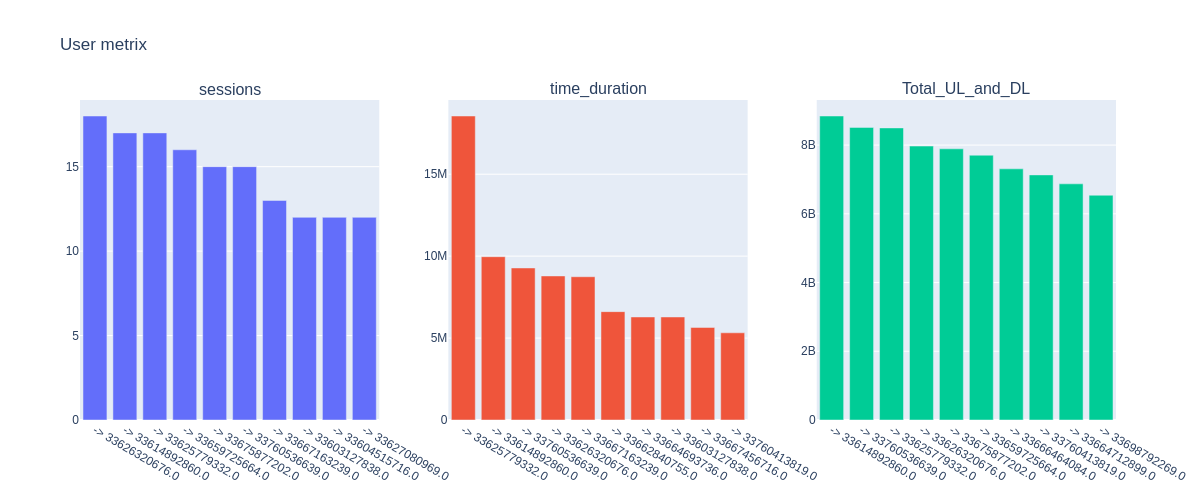

In [12]:
sessions = users.nlargest(10, "sessions")['sessions']
duration = users.nlargest(10, "time_duration")['time_duration']
data_volume = users.nlargest(10, "Total_UL_and_DL")['Total_UL_and_DL']

mult_hist([sessions, duration, data_volume], 1,3, "User metrix", ['sessions', 'time_duration','Total_UL_and_DL'])

Normalize each engagement metric using k-means (k=3)

<Axes: >

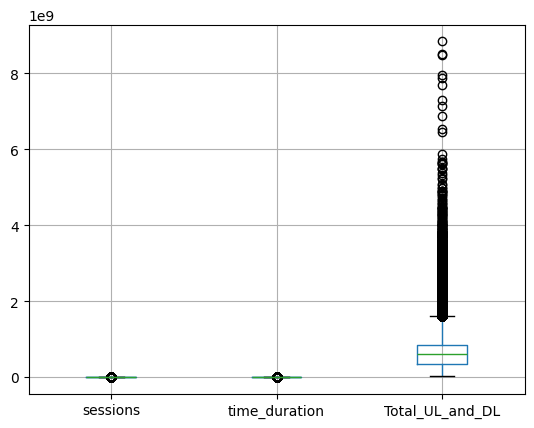

In [13]:
users.boxplot()

In [14]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(users)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.489228,-0.160009,0.380796
1,-0.489228,0.185775,-1.087759
2,-0.489228,-0.062191,-0.194402
3,-0.489228,-0.518292,-0.547682
4,0.749944,-0.586763,1.558196


In [15]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

data_normalized

array([[-0.76408987, -0.2499058 ,  0.59473839],
       [-0.40529394,  0.15390261, -0.90113862],
       [-0.92290096, -0.11732001, -0.36672856],
       ...,
       [-0.12059351,  0.96559818, -0.23038524],
       [-0.63027598,  0.73515192, -0.24960738],
       [-0.12032222,  0.95348474, -0.27638634]])

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
kmeans.labels_

array([1, 2, 2, ..., 0, 2, 0], dtype=int32)

In [17]:
users.insert(0, 'Cluster', kmeans.labels_)
users.head(5)

,Cluster,sessions,time_duration,Total_UL_and_DL
MSISDN/Number,,,,
3.360100e+10,1,1,116720.0,8.786906e+08
3.360100e+10,2,1,181230.0,1.568596e+08
3.360100e+10,2,1,134969.0,5.959665e+08
3.360101e+10,2,1,49878.0,4.223207e+08
3.360101e+10,0,2,37104.0,1.457411e+09


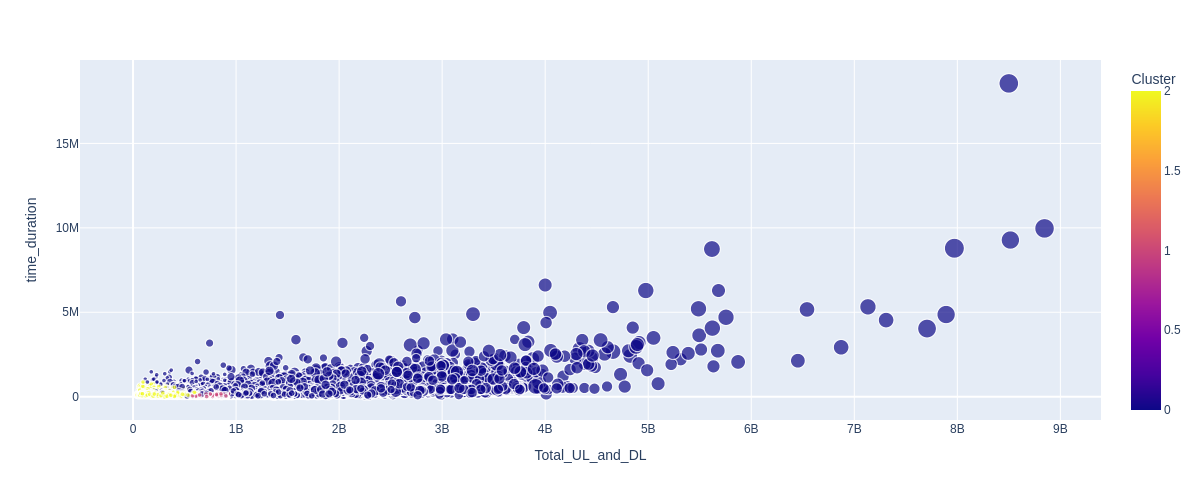

In [18]:
fig = px.scatter(users, x='Total_UL_and_DL', y="time_duration", color='Cluster', size='sessions')
Image(pio.to_image(fig, format='png', width=1200))

Compute the minimum, maximum, average & total non- normalized metrics for each cluster.

In [19]:
cluster1 = users[users["Cluster"]==0]
cluster1.describe()

,Cluster,sessions,time_duration,Total_UL_and_DL
count,29251.0,29251.000000,2.925100e+04,2.925100e+04
mean,0.0,2.428464,2.654731e+05,1.210034e+09
std,0.0,0.942719,3.094638e+05,5.929063e+08
min,0.0,1.000000,1.823500e+04,1.184873e+08
25%,0.0,2.000000,1.310785e+05,8.226163e+08
50%,0.0,2.000000,2.024450e+05,1.108117e+09
75%,0.0,3.000000,3.261020e+05,1.463485e+09
max,0.0,18.000000,1.855375e+07,8.846226e+09


In [20]:
cluster1 = users[users["Cluster"]==1]
cluster1.describe()

,Cluster,sessions,time_duration,Total_UL_and_DL
count,29530.0,29530.0,29530.000000,2.953000e+04
mean,1.0,1.0,93136.462445,7.541730e+08
std,0.0,0.0,56940.990881,9.697646e+07
min,1.0,1.0,7142.000000,5.453653e+08
25%,1.0,1.0,45781.750000,6.732768e+08
50%,1.0,1.0,86399.000000,7.558354e+08
75%,1.0,1.0,127696.000000,8.367962e+08
max,1.0,1.0,340560.000000,9.507607e+08


In [21]:
apps_df = telecom_df.groupby('MSISDN/Number').agg({'Gaming_Total_Data': 'sum', 'Youtube_Total_Data': 'sum', 'Netflix_Total_Data': 'sum','Google_Total_Data': 'sum', 'Email_Total_Data': 'sum', 'Social_Media_Total_Data': 'sum', 'Other_Total_Data': 'sum'})
apps_df.head(10)

,Gaming_Total_Data,Youtube_Total_Data,Netflix_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Other_Total_Data
MSISDN/Number,,,,,,,
3.360100e+10,8.124587e+08,21624548.0,27180981.0,4389005.0,1331362.0,2232135.0,3.865709e+08
3.360100e+10,1.197501e+08,12432223.0,11221763.0,5334863.0,3307781.0,2660565.0,2.817101e+08
3.360100e+10,5.388277e+08,21333570.0,19353900.0,3443126.0,3205380.0,3195623.0,5.016937e+08
3.360101e+10,3.911261e+08,6977321.0,1942092.0,9678493.0,2284670.0,280294.0,3.527970e+07
3.360101e+10,1.314798e+09,41533002.0,49201724.0,18499616.0,3305469.0,2912542.0,8.048045e+08
3.360101e+10,5.116358e+08,34347122.0,30315501.0,15263134.0,7848596.0,3792912.0,4.923728e+08
3.360101e+10,5.484611e+08,26431335.0,45812397.0,10196403.0,1358959.0,2769627.0,2.248887e+08
3.360101e+10,2.823644e+08,18892740.0,15292840.0,12023614.0,2215563.0,1782692.0,1.782015e+08
3.360101e+10,8.330880e+08,63443802.0,54216117.0,14134211.0,4599825.0,5288685.0,1.041883e+09


Aggregate user total traffic per application 

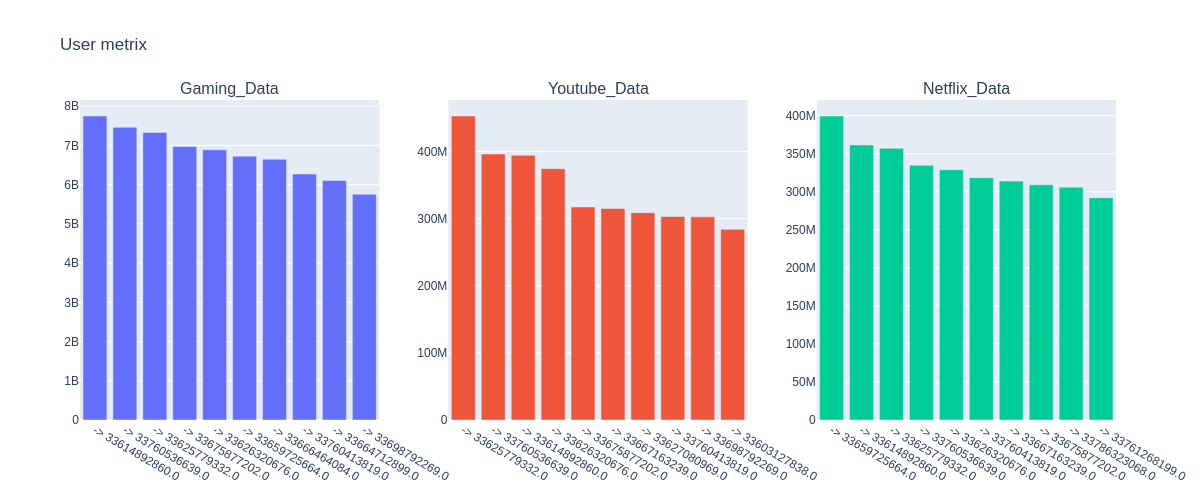

In [23]:
# Top 10 most engaged users per application
Gaming_Data = apps_df.nlargest(10, "Gaming_Total_Data")['Gaming_Total_Data']
Youtube_Data = apps_df.nlargest(10, "Youtube_Total_Data")['Youtube_Total_Data']
Netflix_Data = apps_df.nlargest(10, "Netflix_Total_Data")['Netflix_Total_Data']
Google_Data = apps_df.nlargest(10, "Google_Total_Data")['Google_Total_Data']
Email_Data = apps_df.nlargest(10, "Email_Total_Data")['Email_Total_Data']
Social_Media = apps_df.nlargest(10, "Social_Media_Total_Data")['Social_Media_Total_Data']
Other_Data = apps_df.nlargest(10, "Other_Total_Data")['Other_Total_Data']


mult_hist([Gaming_Data, Youtube_Data, Netflix_Data], 1,
          3, "User metrix", ["Gaming_Data", "Youtube_Data", "Netflix_Data"])

Plot the top 3 most used applications using appropriate charts.

In [ ]:
apps = telecom_df.groupby('MSISDN/Number').agg({'Gaming_Total_Data': 'sum', 'Youtube_Total_Data': 'sum', 'Netflix_Total_Data': 'sum','Google_Total_Data': 'sum', 'Email_Total_Data': 'sum', 'Social_Media_Total_Data': 'sum', 'Other_Total_Data': 'sum'})
apps_df.head(10)

,Gaming_Total_Data,Youtube_Total_Data,Netflix_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Other_Total_Data
MSISDN/Number,,,,,,,
3.360100e+10,8.124587e+08,21624548.0,27180981.0,4389005.0,1331362.0,2232135.0,3.865709e+08
3.360100e+10,1.197501e+08,12432223.0,11221763.0,5334863.0,3307781.0,2660565.0,2.817101e+08
3.360100e+10,5.388277e+08,21333570.0,19353900.0,3443126.0,3205380.0,3195623.0,5.016937e+08
3.360101e+10,3.911261e+08,6977321.0,1942092.0,9678493.0,2284670.0,280294.0,3.527970e+07
3.360101e+10,1.314798e+09,41533002.0,49201724.0,18499616.0,3305469.0,2912542.0,8.048045e+08
3.360101e+10,5.116358e+08,34347122.0,30315501.0,15263134.0,7848596.0,3792912.0,4.923728e+08
3.360101e+10,5.484611e+08,26431335.0,45812397.0,10196403.0,1358959.0,2769627.0,2.248887e+08
3.360101e+10,2.823644e+08,18892740.0,15292840.0,12023614.0,2215563.0,1782692.0,1.782015e+08
3.360101e+10,8.330880e+08,63443802.0,54216117.0,14134211.0,4599825.0,5288685.0,1.041883e+09


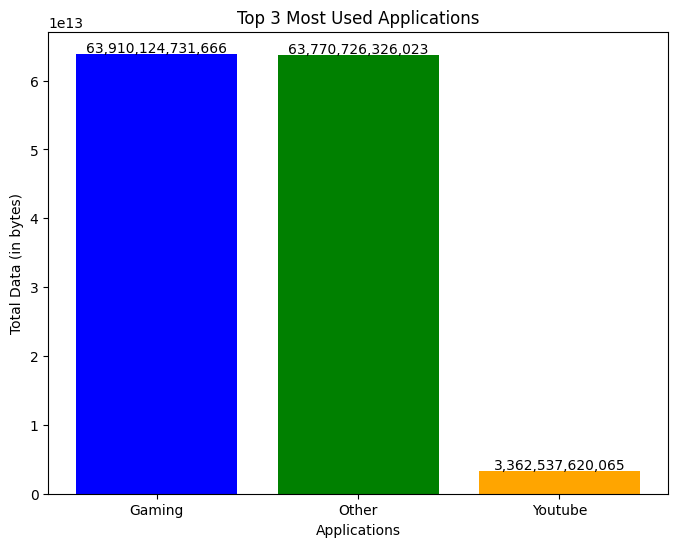

In [ ]:
# Top 3 most used applications
plot_top_applications()


Using k-means clustering algorithm, group users in k engagement clusters based
on the engagement metrics

In [ ]:
distortions, inertias = choose_kmeans(data_normalized, 1)
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_normalized)
users["cluster"]= kmeans.labels_
users

,Cluster,sessions,time_duration,Total_UL_and_DL,cluster
MSISDN/Number,,,,,
3.360100e+10,1,1,116720.0,8.786906e+08,3
3.360100e+10,2,1,181230.0,1.568596e+08,1
3.360100e+10,2,1,134969.0,5.959665e+08,1
3.360101e+10,2,1,49878.0,4.223207e+08,1
3.360101e+10,0,2,37104.0,1.457411e+09,0
...,...,...,...,...,...
3.379000e+10,1,1,8810.0,7.146416e+08,3
3.379000e+10,2,1,140988.0,4.803073e+08,1
3.197021e+12,0,1,877385.0,2.321240e+08,2
